In [16]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import tensorflow as tf
print(tf.__version__)
from keras.models import load_model

2.7.0


In [17]:
images=[]
classNo=[]
path="dataset"

In [18]:
# Load data
for x in range(0, 2):
    myPicList=os.listdir(path+"/"+str(x))
    for y in myPicList:
        curImg=cv2.imread(path+"/"+str(x)+"/"+y)
        curImg=cv2.resize(curImg,(32,32))
        images.append(curImg)
        classNo.append(x)
    print(x)

images=np.array(images)
classNo=np.array(classNo)

0
1


In [19]:
# chia nhỏ dữ liệu
x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size=0.2)
print(x_train.shape, " ", y_train.shape, " ", y_test.shape, x_test.shape)

(481, 32, 32, 3)   (481,)   (121,) (121, 32, 32, 3)


In [20]:
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=0.2)
print(x_train.shape," ", type(x_train))

(384, 32, 32, 3)   <class 'numpy.ndarray'>


In [21]:
# cái này sử dụng để normalize ảnh cho việc train
def preprocessing(img):
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   # img=cv2.equalizeHist(img)
    img=img/255 
    return img

In [22]:
# normalize data
x_train= np.array(list(map(preprocessing, x_train)))
x_test= np.array(list(map(preprocessing, x_test)))
x_validation= np.array(list(map(preprocessing, x_validation)))

In [23]:
#reshape data
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)

In [24]:
# tạo constructor ImageDataGenerator 
dataGen=ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10)

dataGen.fit(x_train)

# convert interger vector into binary array
y_train=to_categorical(y_train, 2)
y_test=to_categorical(y_test, 2)
y_validation=to_categorical(y_validation, 2)

In [25]:
def myModel():


	model=Sequential()
	model.add((Conv2D(32, (3,3), input_shape=(32,32,1),activation='relu')))
	model.add((Conv2D(32, (3,3),activation='relu')))
	model.add(MaxPooling2D(pool_size=(2,2)))

	model.add((Conv2D(64, (3,3),activation='relu')))
	model.add((Conv2D(64, (3,3),activation='relu')))
	model.add(MaxPooling2D(pool_size=(2,2)))
	model.add(Dropout(0.5))


	model.add(Flatten())
	model.add(Dense(64, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(2, activation='softmax'))
	model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
	return model

def get_className(classNo):
    if classNo==0:
        return "Mask"
    elif classNo==1:
        return "No Mask"

In [28]:

model=myModel()

# train
history=model.fit_generator(dataGen.flow(x_train, y_train,batch_size=50),                 
epochs=10,
validation_data=(x_validation,y_validation),
	shuffle=1)


model.save("MyTrainingModel2.h5")

<ipython-input-28-1f4f6dafd864>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(dataGen.flow(x_train, y_train,batch_size=50),


Epoch 1/10
8/8 [==============================] - 1s 114ms/step - loss: 0.6690 - accuracy: 0.5391 - val_loss: 0.6321 - val_accuracy: 0.4948
Epoch 2/10
8/8 [==============================] - 1s 91ms/step - loss: 0.6157 - accuracy: 0.6146 - val_loss: 0.4905 - val_accuracy: 0.5361
Epoch 3/10
8/8 [==============================] - 1s 90ms/step - loss: 0.3971 - accuracy: 0.8568 - val_loss: 0.1395 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 1s 91ms/step - loss: 0.0823 - accuracy: 0.9948 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 1s 92ms/step - loss: 0.0121 - accuracy: 0.9974 - val_loss: 3.2732e-05 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 1s 90ms/step - loss: 0.1420 - accuracy: 0.9661 - val_loss: 0.1017 - val_accuracy: 0.9588
Epoch 7/10
8/8 [==============================] - 1s 97ms/step - loss: 0.6347 - accuracy: 0.8698 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 8/10
8/8 [======

In [29]:
facedetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

threshold=0.90

# khởi tạo camera đầu tiên của máy tính, có index = 0
cap=cv2.VideoCapture(0)

# set parameter cho camera
cap.set(3, 640)
cap.set(4, 480)

font=cv2.FONT_HERSHEY_COMPLEX

#load model
model = load_model('MyTrainingModel2.h5')

In [ ]:
while True:
    sucess, imgOrignal=cap.read()
    # sucess có kiểu là boolean, dòng này có nghĩa nếu imgOrignal được đọc thành công nếu sucess = true(tức mở camera thành công)
    # khá là giống success&imgOrignal= cap.read()
    
    # trả về hình chữ nhật ranh giới cho khuôn mặt được phát hiện
    # có ý nghĩa sẽ dùng mọi feature của file haarcascade_frontalface_default.xml để phát hiện
    faces = facedetect.detectMultiScale(imgOrignal,1.3,5) #image/size image được giảm/
    # ở đây ta giảm tỉ lệ size của ảnh đi 1,3 lần để trong trường hợp khuôn mặt to sẽ giảm đi để có thể detect được khuôn mặt
    # điều này có thể khiến việc detect nhanh hơn, thuật toán chạy nhanh hơn tuy nhiên
    # Khi giảm tỉ lệ đi đồng nghĩa có thể bỏ sót 1 vài chi tiết của khuôn mặt do vậy không thể giảm quá nhiều
    # 5 là tham số chỉ đỉnh số lượng hàng xóm mà hình chữ nhật khuông mặt có(kiểu hình chữ nhật nhỏ xung quanh ấy :)) cũng không chắc nữa). Nó sẽ quyết định
    # đến chất lượng khi phát hiện ảnh. Giá trị càng cao thì ít bị phát hiện hơn nhưng chất lượng cao hơn. 5 là con số vừa đủ
    
    for x,y,w,h in faces: # x-cor, y-cor, width, height, dựa vào 4 tham số này để vẽ hình chữ nhật xung quanh khuôn mặt 
        crop_img=imgOrignal[y:y+h,x:x+w] # lấy ảnh chứa mặt, từ hàng y-> y+h, từ cột x->x+w
        
        # chuyển sang kênh màu xám vì kênh màu xám dễ xử lý hơn, và ít chuyên sâu về tính toán vì nó chỉ chứa 1 kênh đen trắng
        # resize 32x32
        img=cv2.resize(crop_img, (32,32)) 
        
        # normalize img
        img=preprocessing(img)
        
        # reshape lại
        img=img.reshape(1, 32, 32, 1) # 1 ảnh/32/32/kênh gray

        # tính prediction từ model
        prediction=model.predict(img)
        
        # lấy classIndex của prediction, prediction có dạng là một numpy array, np.argmax trả về index của giá trị lớn nhất
        # của mảng bắt đầu theo cột chỉ định là 1
        classIndex= np.argmax(prediction,axis=1)
        
        probabilityValue=np.amax(prediction) #trả về giá trị lớn nhất
        print(probabilityValue, " " , classIndex," ", prediction)
        if probabilityValue<threshold:
#             print(classIndex)
            if classIndex==1:
#                # vẽ giao diện
                cv2.rectangle(imgOrignal,(x,y),(x+w,y+h),(0,255,0),2) # điểm bắt đầu, điểm kết thúc (2 điểm của 2 góc hình chữ nhật), màu, độ dày của cạnh
                cv2.rectangle(imgOrignal, (x,y-40),(x+w, y), (0,255,0),-2)
                cv2.putText(imgOrignal, str(get_className(classIndex)),(x,y-10), font, 0.75, (255,255,255),1, cv2.LINE_AA)
            elif classIndex==0:
#              
                cv2.rectangle(imgOrignal,(x,y),(x+w,y+h),(50,50,255),2)
                cv2.rectangle(imgOrignal, (x,y-40),(x+w, y), (50,50,255),-2)
                cv2.putText(imgOrignal, str(get_className(classIndex)),(x,y-10), font, 0.75, (255,255,255),1, cv2.LINE_AA)
    cv2.imshow("Result",imgOrignal)
    
    k=cv2.waitKey(1) #đợi nhập key
    if k==ord('q'):# nhập q để break loop
        break


cap.release()
cv2.destroyAllWindows()

0.558444   [1]   [[0.44155595 0.558444  ]]
0.54022956   [1]   [[0.45977038 0.54022956]]
0.52497864   [1]   [[0.4750214  0.52497864]]
0.51689565   [1]   [[0.4831043  0.51689565]]
0.50091255   [0]   [[0.50091255 0.49908742]]
0.50257313   [0]   [[0.50257313 0.49742684]]
0.5087471   [1]   [[0.4912529 0.5087471]]
0.52873117   [1]   [[0.4712688  0.52873117]]
0.53461784   [1]   [[0.46538213 0.53461784]]
0.5467707   [1]   [[0.4532294 0.5467707]]
0.53747785   [1]   [[0.4625221  0.53747785]]
0.54830396   [1]   [[0.451696   0.54830396]]
0.5553243   [1]   [[0.44467565 0.5553243 ]]
0.5489965   [1]   [[0.45100355 0.5489965 ]]
0.5529492   [1]   [[0.4470508 0.5529492]]
0.5556468   [1]   [[0.44435325 0.5556468 ]]
0.5519811   [1]   [[0.44801897 0.5519811 ]]
0.54893434   [1]   [[0.4510657  0.54893434]]
0.5471513   [1]   [[0.4528487 0.5471513]]
0.54515296   [1]   [[0.454847   0.54515296]]
0.5516862   [1]   [[0.44831377 0.5516862 ]]
0.55152047   [1]   [[0.44847944 0.55152047]]
0.554286   [1]   [[0.44571394

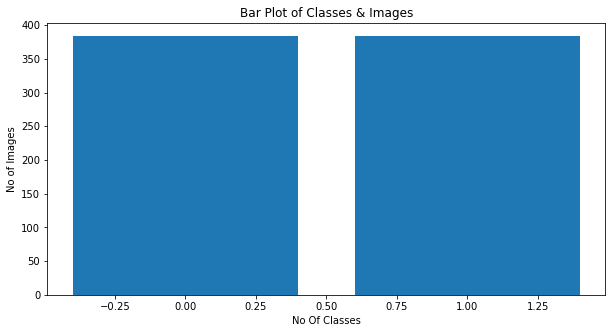

In [31]:
numOfSample=[]

for x in range(0,2):
    numOfSample.append(len(np.where(y_train==x)[0]))


plt.figure(figsize=(10,5))
plt.bar(range(0, 2),numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()


range(0, 10)


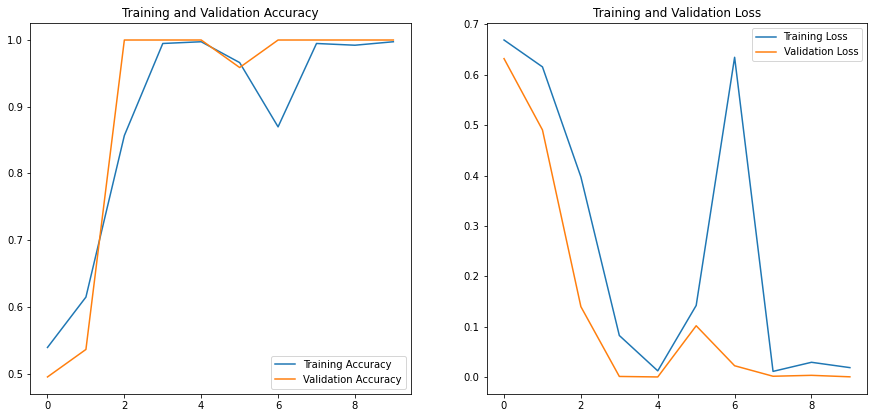

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)
print(epochs_range)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()